In [40]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os
import pandas as pd

import dotenv

dotenv.load_dotenv()

import pprint
from pprint import pp 
pprint.pp(dict(os.environ))

os.getenv('JOURNAL_ROOT')


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

!rm -rf output
logger = logging.getLogger()


logger.setLevel(logging.ERROR)
logging.getLogger().setLevel(logging.WARNING)

def mode_debug():
    logging.getLogger().setLevel(logging.DEBUG)
def mode_info():
    logging.getLogger().setLevel(logging.INFO)
def mode_warn():
    logging.getLogger().setLevel(logging.WARN)
def mode_err():
    logging.getLogger().setLevel(logging.ERROR)



/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts:/Users/tobiaspucher/.lmstudio/bin
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'COMMAND_MODE': 'unix2003',
 'CONDA_EXE': '/Users/tobiaspucher/miniconda3/bin/conda',
 'CONDA_PYTHON_EXE': '/Users/tobiaspucher/miniconda3/bin/python',
 'CONDA_SHLVL': '1

In [67]:

# src/journal.py
"""
This file is used to define some rudimentray functions for test data and also the actual journal with real data.

The main goal is to use the features.py file to define features step by step for each trade and then do little to no changes afterwards, besides maybe adding 
new features afterwards. The trades are then stored in a journal, which is simply a list of trades.
The journal supports going over all the trades and creating a feature dataframe for further analysis.

"""

from datetime import datetime, timedelta
import markdown
import os
import random
import logging
import re  # Add regex module for pattern matching
import scipy
from datetime import datetime, timedelta



# MY LIBRARIES
import trade
import tradecli
import analysis

logging.basicConfig(level=logging.INFO)

# TRADING ACCOUNTS
ACC_IDEAL = "ideal"
ACC_MT5_VANTAGE = "mt5_vantage"
ACC_TEST = "test_account"


_trades = []
t01 = {'uid': '01'}
t = trade.Trade(entry_price=85490.33,
                size=0.5,
                entry_time="2025-04-15 13:11:29",
                side="long",
                sl_price=85379.48,
                tp_price=90068.42,
                sl_monetary_value=-48.70)

t.add_position(entry_price=85557.41,
                    size=0.5,
                    entry_time="2025-04-15 13:25.18")


t.close_position(exit_price=85578, exit_time="2025-04-15 14:39")
t01.update(t.to_trade_row())
t01.update({'POI_1h_SC':True, 
            'POI_1h_AOI':True, 
            'POI_15m_liqgrb':False, 
            'EM_1m_type3':True, 
            'RM':'1R_BE', 
            'BEHAVIOUR':[('CONSOLIDATION',False)]})
_trades.append(t01)

t02 = {'uid': '02'}
t = trade.Trade(entry_price=85490.33,
                size=0.5,
                entry_time="2025-04-15 13:11:29",
                side="long",
                sl_price=85379.48,
                tp_price=90068.42,
                sl_monetary_value=-48.70)

t.add_position(entry_price=85557.41,
                    size=0.5,
                    entry_time="2025-04-15 13:25.18")


t.close_position(exit_price=85578, exit_time="2025-04-15 14:39")
t02.update(t.to_trade_row())
t02.update({'POI_1h_SC':True, 'POI_1h_AOI':False, 'POI_15m_liqgrb':True,
            'EM_1m_type3':False, 
            'EM_POST_1m_type3':True,
            'RM':'1R_BE', 
            'BEHAVIOUR':[('CONSOLIDATION',True)]})
_trades.append(t02)

df = pd.DataFrame(_trades)
df['account'] = ACC_MT5_VANTAGE

display(df.tail(4))
display(df.describe())

print(df.columns)
print(df.dtypes)

# report Nans for each column
print('Nans:')
print(df.isna().sum())

# report Nans for each column as percentage
print('Nans as percentage:')
print(df.isna().sum() / df.shape[0])

,uid,side,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,initial_size,final_size,total_profit,point_value,initial_sl_distance,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,POI_1h_SC,POI_1h_AOI,POI_15m_liqgrb,EM_1m_type3,RM,BEHAVIOUR,EM_POST_1m_type3,account
0,01,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,True,True,False,True,1R_BE,"[(CONSOLIDATION, False)]",NaN,mt5_vantage
1,02,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,True,False,True,False,1R_BE,"[(CONSOLIDATION, True)]",True,mt5_vantage


,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,initial_size,final_size,total_profit,point_value,initial_sl_distance,sl_price,tp_price,n_modifications,potential_profit,potential_loss,n_partial_closes
count,2,2,2.0,2.00,2.00,2.0,2.0,2.000000,2.000000,2.00,2.00,2.00,2.0,2.0,2.0,2.0
mean,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
min,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
25%,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
50%,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
75%,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
max,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3.0,0.0,0.0,0.0
std,NaN,NaN,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.0,0.0,0.0,0.0


Index(['uid', 'side', 'initial_entry_time', 'final_exit_time', 'duration_sec',
       'initial_entry_price', 'avg_entry_price', 'initial_size', 'final_size',
       'total_profit', 'point_value', 'initial_sl_distance', 'sl_price',
       'tp_price', 'n_modifications', 'potential_profit', 'potential_loss',
       'has_partials_closed', 'n_partial_closes', 'POI_1h_SC', 'POI_1h_AOI',
       'POI_15m_liqgrb', 'EM_1m_type3', 'RM', 'BEHAVIOUR', 'EM_POST_1m_type3',
       'account'],
      dtype='object')
uid                            object
side                           object
initial_entry_time     datetime64[ns]
final_exit_time        datetime64[ns]
duration_sec                  float64
initial_entry_price           float64
avg_entry_price               float64
initial_size                  float64
final_size                    float64
total_profit                  float64
point_value                   float64
initial_sl_distance           float64
sl_price                      float64
tp

In [68]:
mode_warn()

def prepare_data(df:pd.DataFrame):
    df = df.rename(columns={'return': 'return_points', 'initial_entry_time':'entry_time'})
    df = df[(df['account'] != ACC_TEST) & (True)]
    
    return df

df = prepare_data(df)
 
 
df

,uid,side,entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,initial_size,final_size,total_profit,point_value,initial_sl_distance,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,POI_1h_SC,POI_1h_AOI,POI_15m_liqgrb,EM_1m_type3,RM,BEHAVIOUR,EM_POST_1m_type3,account
0,01,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,True,True,False,True,1R_BE,"[(CONSOLIDATION, False)]",NaN,mt5_vantage
1,02,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,True,False,True,False,1R_BE,"[(CONSOLIDATION, True)]",True,mt5_vantage


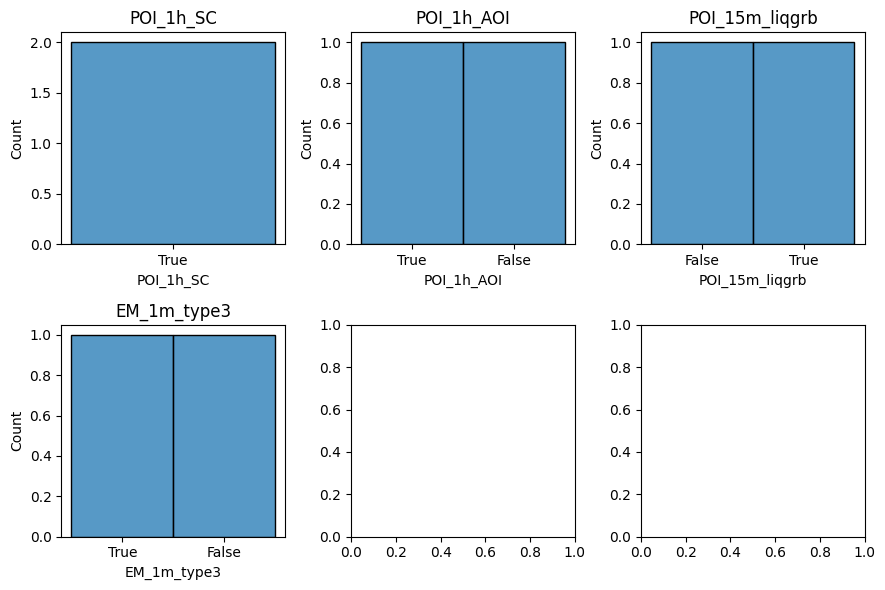

In [72]:
analysis.plot_feature_distributions(df, ['POI_1h_SC', 'POI_1h_AOI', 'POI_15m_liqgrb', 'EM_1m_type3'],)

In [47]:
df

,uid,side,entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,initial_size,final_size,total_profit,point_value,initial_sl_distance,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,account
0,01,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.5,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,mt5_vantage


,side,initial_entry_time,final_exit_time,duration_sec,initial_entry_price,avg_entry_price,current_size,total_profit,point_value,initial_sl_distance,sl_price,tp_price,n_modifications,potential_profit,potential_loss,has_partials_closed,n_partial_closes,first_partial_close_time,last_partial_close_time,modifications
0,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'initial_trade', 'time': 2025-04-15..."
1,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'add_position', 'time': 2025-04-15 ..."
2,long,2025-04-15 13:11:29,2025-04-15 14:39:00,5251.0,85490.33,85523.87,0.0,47.562129,0.878665,110.85,85379.48,90068.42,3,0.0,0.0,False,0,None,None,"{'action': 'close_trade', 'time': 2025-04-15 1..."


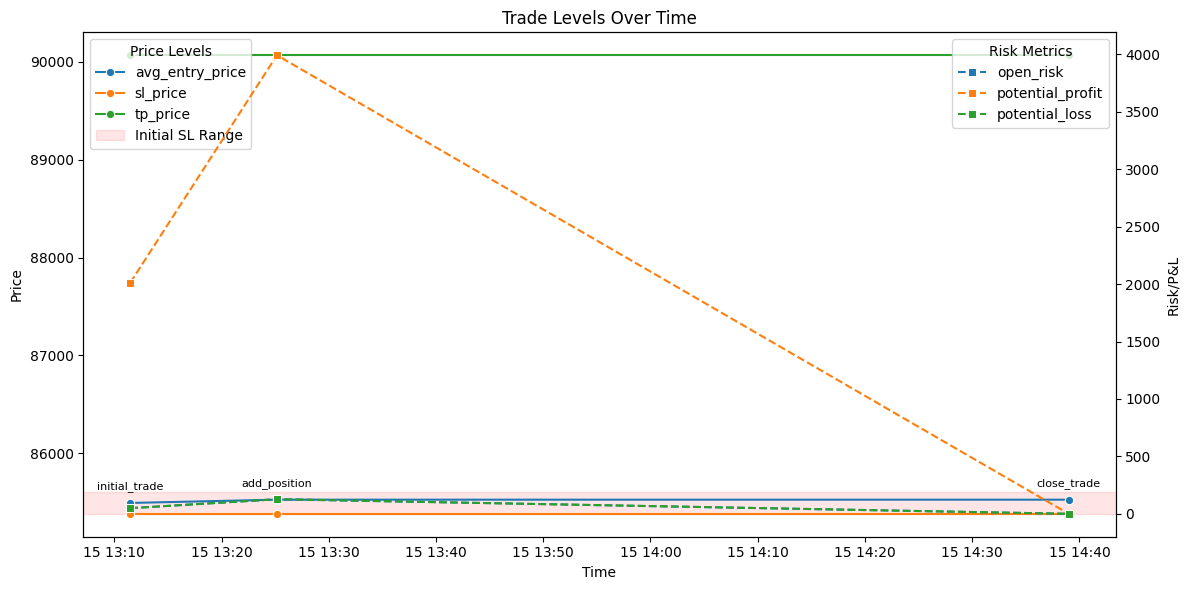

In [49]:
df = pd.DataFrame(t.get_trade_summary())
display(df)
d = t.to_trade_row()
pd.DataFrame([d])
t.plot_trade_levels()
